In [1]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 



for i in range(len(y)):
    if y.loc[i, "class"] == "ckd\t":
        y.loc[i, "class"] = "ckd"

disty = set(y["class"])
print(disty)


{'notckd', 'ckd'}


/var/folders/km/b448v1t16l77v859svkjxmzc0000gn/T/ipykernel_37208/1242311828.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[i, "class"] = "ckd"


The dataset has some issues converting it into Pandas dataframe as it contains TAB/ spaces in the data which I correct them in by remove "\t" which represents tab.

1.
This dataset contains medical information for each record, including whether an individual has chronic kidney disease ("ckd" or "notckd"). We  would like to utilize this dataset to predict the presence of chronic kidney disease, In generial, we want to use model for classfication, essentially classifying groups of individuals who may potentially have the condition of chronic kidney disease.

In [2]:
print(X)
print(y)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

In [3]:

print(X.dtypes)
print(y.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object
class    object
dtype: object


In [4]:
X.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [5]:

X.loc[X["rbc"] == "normal", "rbc"] = 0
X.loc[X["rbc"] == "abnormal", "rbc"] = 1


In [6]:
X["pc"].isna().sum()

X.loc[X["pc"] == "normal", "pc"] = 0
X.loc[X["pc"] == "abnormal", "pc"] = 1


In [7]:
X["pcc"].isna().sum()


X.loc[X["pcc"] == "notpresent", "pcc"] = 0
X.loc[X["pcc"] == "present", "pcc"] = 1


In [8]:
X["ba"].isna().sum()


X.loc[X["ba"] == "notpresent", "ba"] = 0
X.loc[X["ba"] == "present", "ba"] = 1


In [9]:
X["htn"].isna().sum()


X.loc[X["htn"] == "yes", "htn"] = 1
X.loc[X["htn"] == "no", "htn"] = 0

In [10]:
X["dm"].isna().sum()




for i in range(len(y)):
    if X.loc[i, "dm"] == "\tno":
        X.loc[i, "dm"] = "no"

X.loc[X["dm"] == "yes", "dm"] = 1
X.loc[X["dm"] == "no", "dm"] = 0



In [11]:
X["cad"].isna().sum()


distinct7 = set(X["cad"])


X.loc[X["cad"] == "yes", "cad"] = 1
X.loc[X["cad"] == "no", "cad"] = 0

print(distinct7)




{'yes', nan, 'no'}


In [12]:
X["appet"].isna().sum()


distinct8 = set(X["appet"])


X.loc[X["appet"] == "good", "appet"] = 1
X.loc[X["appet"] == "poor", "appet"] = 0

print(distinct8)

{nan, 'good', 'poor'}


In [13]:
X.loc[X["pe"] == "yes", "pe"] = 1
X.loc[X["pe"] == "no", "pe"] = 0
distinct9 = set(X["appet"])
X.loc[X["ane"] == "yes", "ane"] = 1
X.loc[X["ane"] == "no", "ane"] = 0
distinct10 = set(X["appet"])
print(distinct9,distinct10)

{0, 1, nan} {0, 1, nan}


In [14]:
print(X.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object


In [15]:
X.shape
y.shape
X.describe

<bound method NDFrame.describe of       age    bp     sg   al   su  rbc pc pcc ba    bgr  ...  hemo   pcv  \
0    48.0  80.0  1.020  1.0  0.0  NaN  0   0  0  121.0  ...  15.4  44.0   
1     7.0  50.0  1.020  4.0  0.0  NaN  0   0  0    NaN  ...  11.3  38.0   
2    62.0  80.0  1.010  2.0  3.0    0  0   0  0  423.0  ...   9.6  31.0   
3    48.0  70.0  1.005  4.0  0.0    0  1   1  0  117.0  ...  11.2  32.0   
4    51.0  80.0  1.010  2.0  0.0    0  0   0  0  106.0  ...  11.6  35.0   
..    ...   ...    ...  ...  ...  ... ..  .. ..    ...  ...   ...   ...   
395  55.0  80.0  1.020  0.0  0.0    0  0   0  0  140.0  ...  15.7  47.0   
396  42.0  70.0  1.025  0.0  0.0    0  0   0  0   75.0  ...  16.5  54.0   
397  12.0  80.0  1.020  0.0  0.0    0  0   0  0  100.0  ...  15.8  49.0   
398  17.0  60.0  1.025  0.0  0.0    0  0   0  0  114.0  ...  14.2  51.0   
399  58.0  80.0  1.025  0.0  0.0    0  0   0  0  131.0  ...  15.8  53.0   

       wbcc  rbcc  htn  dm  cad  appet pe ane  
0    7800.0   5.2

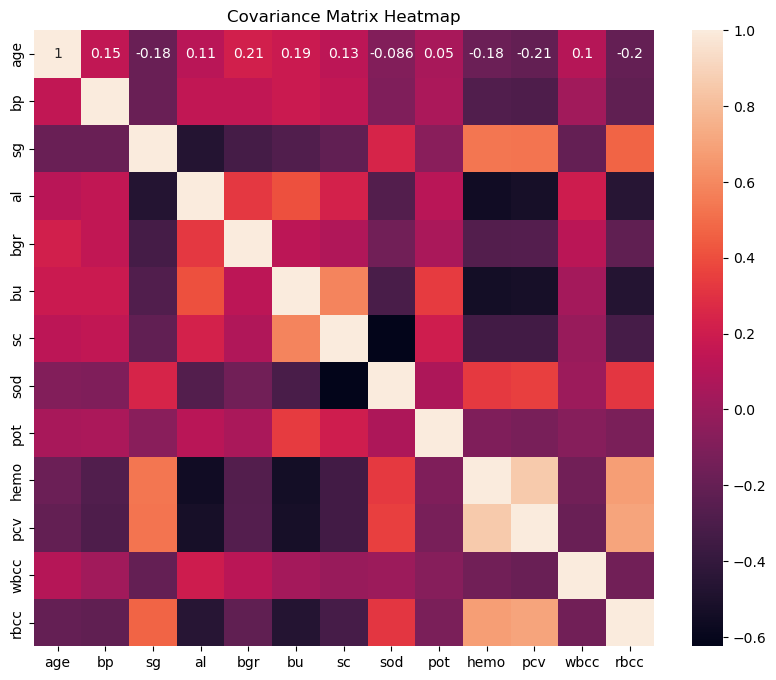

In [38]:
numeric_X = X.select_dtypes(include=['float']).drop(columns=["su"])

# Plot heatmap of covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_X.corr(),annot=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

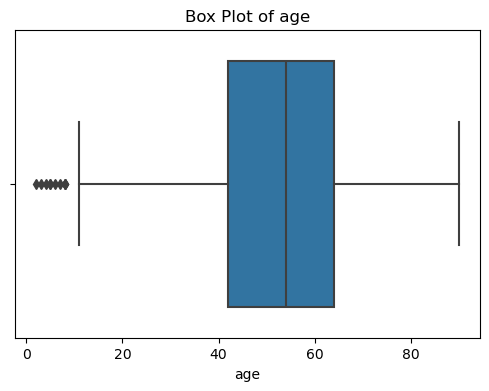

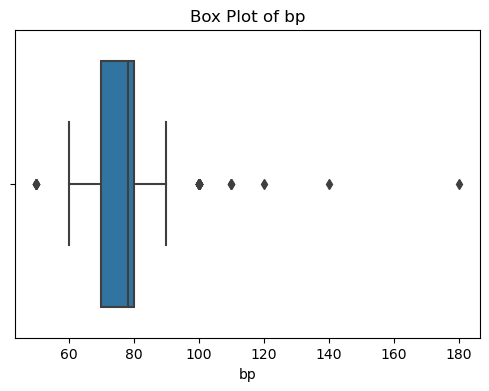

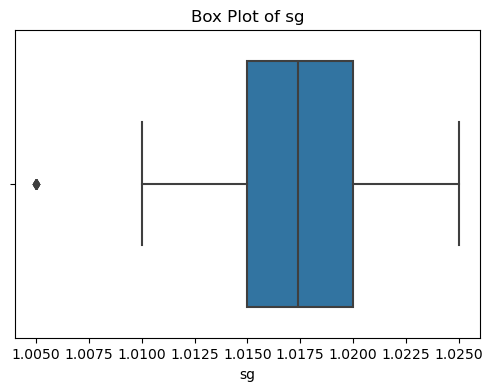

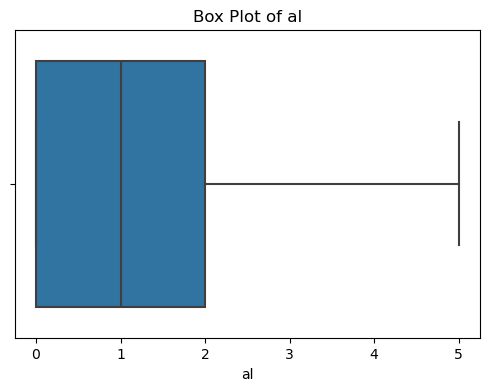

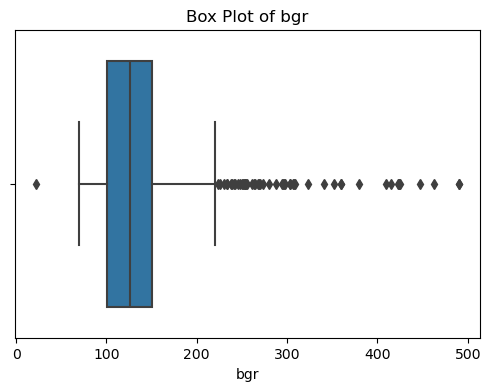

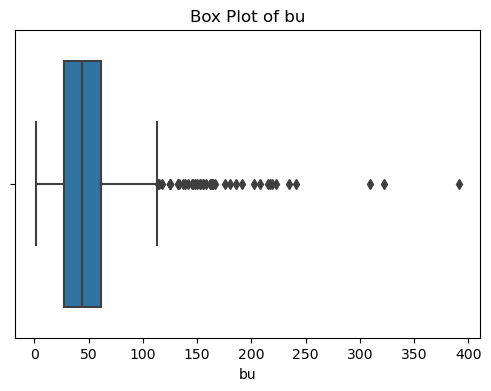

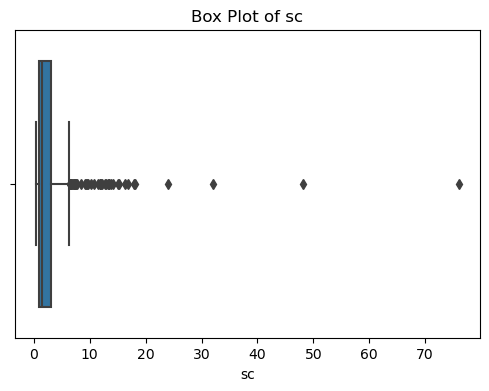

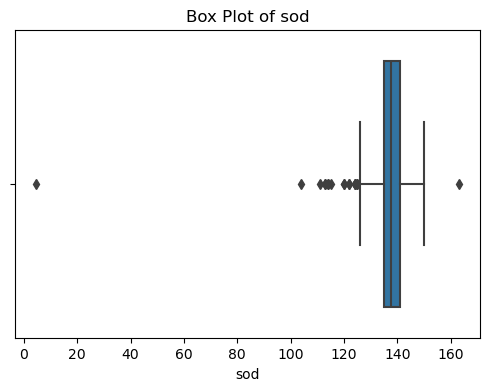

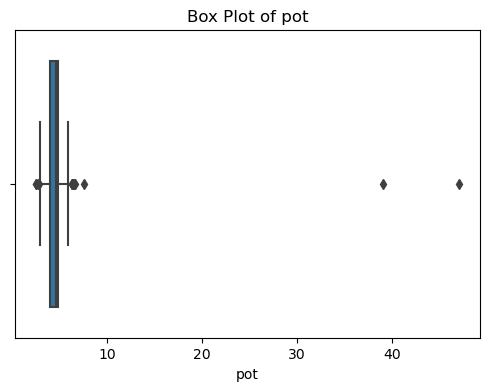

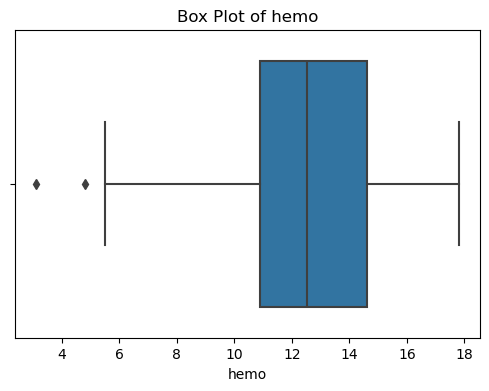

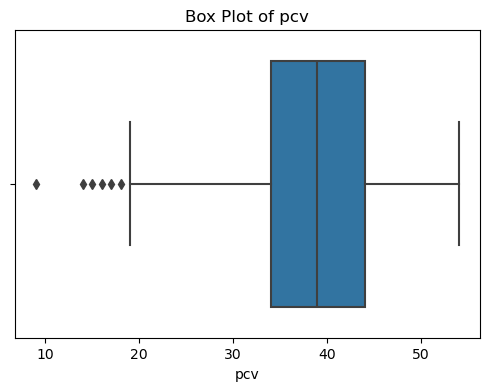

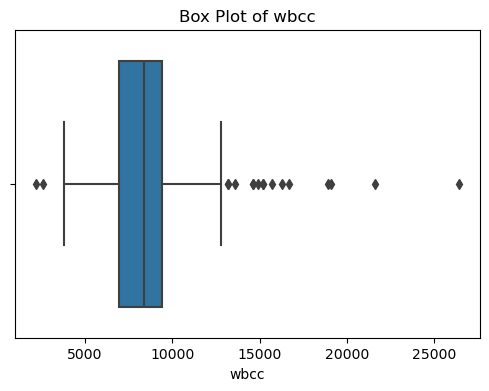

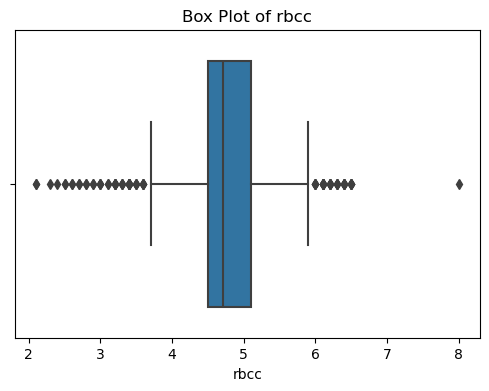

In [39]:

# Plotting box plots for each numerical column separately
for col in numeric_X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numeric_X[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

Using classification identify disease.

In [17]:
X.dtypes
y.dtypes

class    object
dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)



In [19]:
cs_dt = DecisionTreeClassifier(
    max_depth =30, 
    random_state=1
) 



              precision    recall  f1-score   support

         ckd       0.96      0.97      0.97        75
      notckd       0.95      0.93      0.94        45

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120

              precision    recall  f1-score   support

         ckd       0.96      0.97      0.97        75
      notckd       0.95      0.93      0.94        45

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



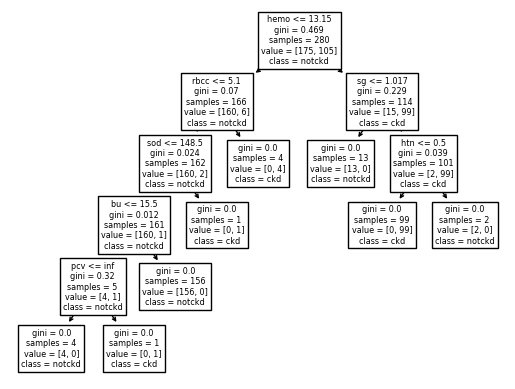

In [20]:
cs_dt.fit(X_train, y_train)

plot_tree(
    cs_dt, 
    max_depth= 30, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd']
)

pred = cs_dt.predict(X_test)
pred[:5]

print(classification_report(y_test, pred))
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

cs_dt.score(X_test, y_test)

print(classification_report(y_test, pred))

In [21]:
path = cs_dt.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [22]:
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=0, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [23]:
depth = [clf.tree_.max_depth for clf in clfs]
depth

[5, 3, 3, 2, 2, 1, 0]

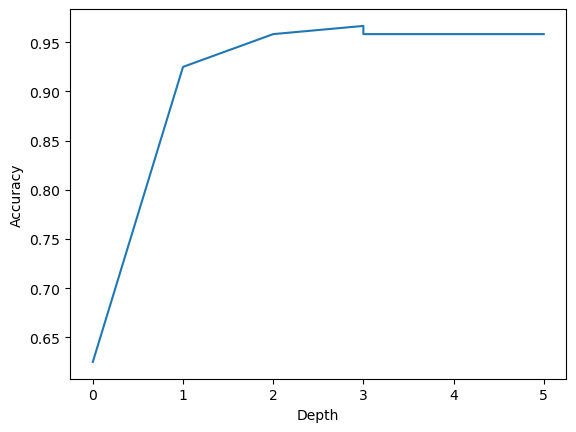

In [24]:
test_score = [clf.score(X_test, y_test) for clf in clfs]
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [25]:
cs_dt_best = DecisionTreeClassifier(
    max_depth = 3, 
    random_state=1
    ) 
cs_dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

              precision    recall  f1-score   support

         ckd       0.96      0.97      0.97        75
      notckd       0.95      0.93      0.94        45

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120

Accuracy: 0.9583333333333334


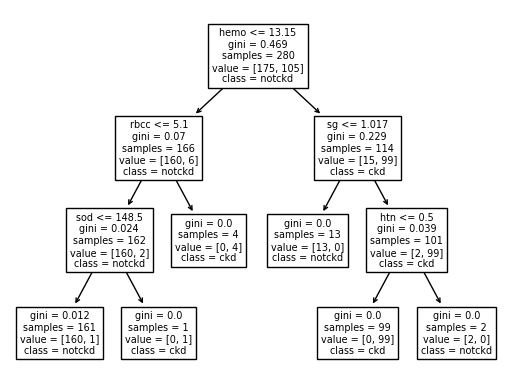

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(
    cs_dt_best, 
    max_depth= 3, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd']
)

pred2 = cs_dt.predict(X_test)

print(classification_report(y_test, pred2))
cm = pd.DataFrame(confusion_matrix(y_test, pred2), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

cs_dt.score(X_test, y_test)
print("Accuracy:", accuracy_score(y_test, pred2))

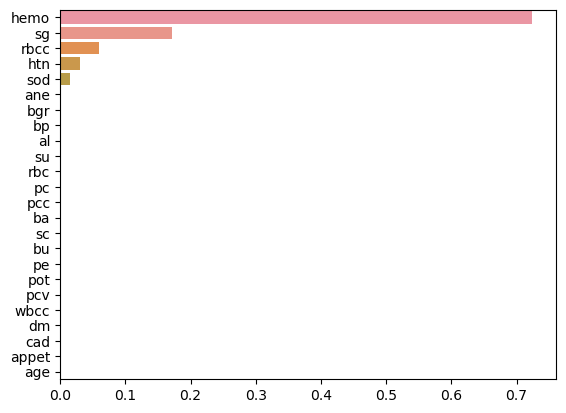

In [27]:
fea_imp = cs_dt_best.feature_importances_
sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

         ckd       0.96      0.99      0.97        75
      notckd       0.98      0.93      0.95        45

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



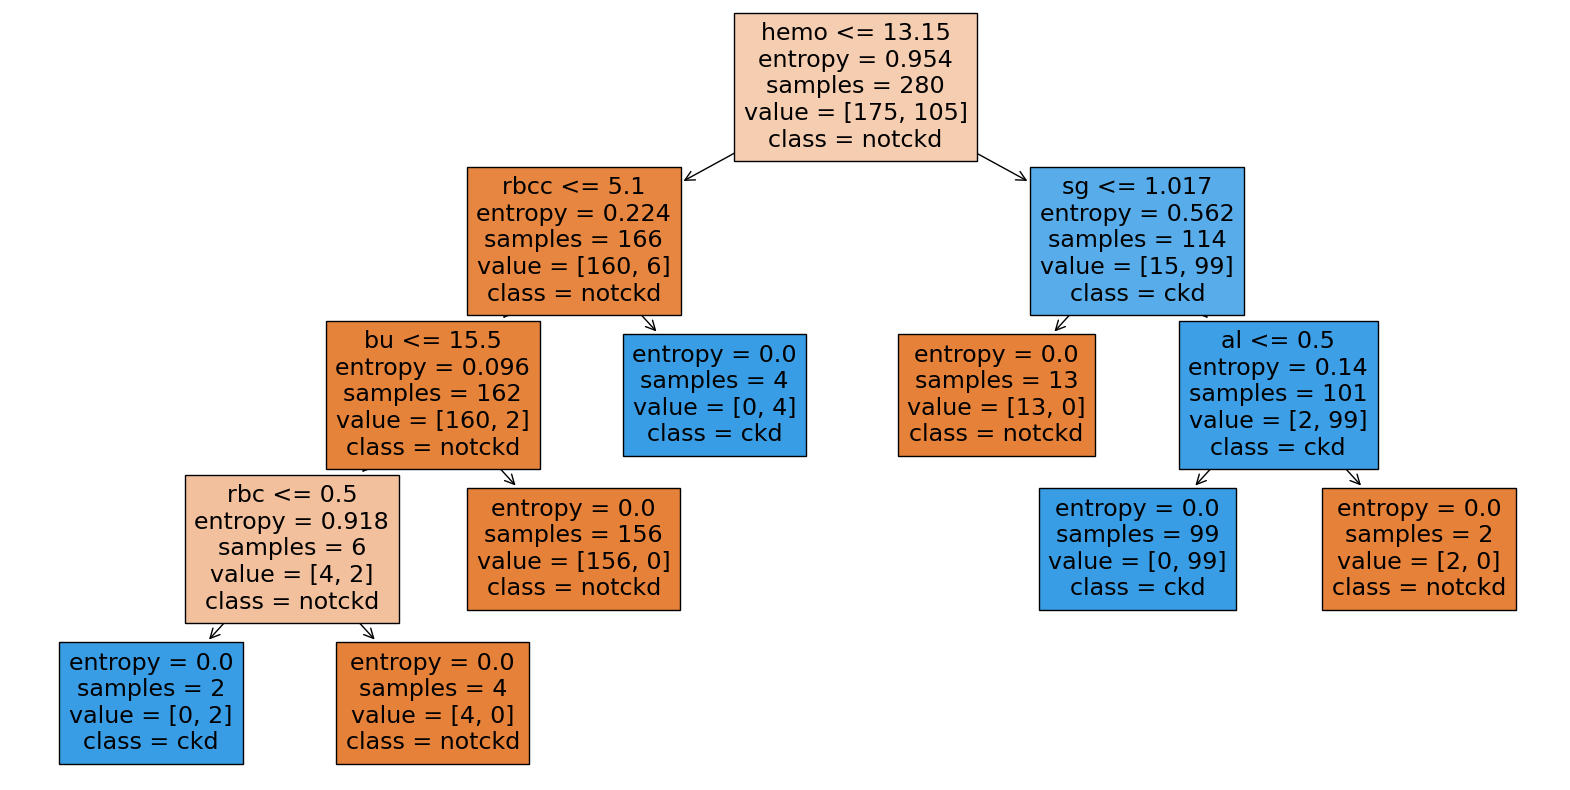

In [28]:
clf = DecisionTreeClassifier(max_depth =30, 
    random_state=1,criterion='entropy')  
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True,feature_names = X_train.columns.tolist(),class_names=['notckd', 'ckd'])
plt.show()


In [29]:
import pandas as pd
from sklearn.impute import SimpleImputer


float_col = X.select_dtypes(include=['float']).columns.tolist()
num_imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X.loc[:, float_col] = num_imputer.fit_transform(X.loc[:, float_col])

# For categorical features
obj_col = X.select_dtypes(include=['object']).columns.tolist()
cat_imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
X.loc[:, obj_col] = cat_imputer.fit_transform(X.loc[:, obj_col])

X.isna().sum()



age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)



In [31]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC


# Initialize and train SVM model
svm = SVC(kernel='linear')
y_train = np.ravel(y_train)
svm.fit(X_train, y_train)



SVC(kernel='linear')

In [32]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[74  1]
 [ 3 42]]
